# Assignment two

## Declare Libraries, Parameters and other helper functions that i made
Note: I am using the sodapy package as suggested by the NYC Open Data/Socrata website for the extra credit.
(url: https://dev.socrata.com/foundry/data.cityofnewyork.us/2yzn-sicd)

In [55]:
#load libraries
import pandas as pd
import numpy as np
import json
import requests 
import os
import sys
import matplotlib.pyplot as plt
from sodapy import Socrata
from subprocess import call

#declare parameters
url="https://data.cityofnewyork.us/resource/2yzn-sicd.json"
%matplotlib inline

#declare environmental variable
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

#create function to load a json file to pandas and creates a local copy if it hasn't been made
def json_to_pandas(url,path,lim):
    #declare parameters
    name = url.split('/')[-1].replace(".json",".csv")
    filename=path+"/"+name
    #checks if local file exists
    if os.path.isfile(filename)==True:
        #loads from existing csv file and returns a pandas dataframe
        print('File exists, Please proceed to the next step')
        return pd.read_csv(filename,encoding='utf-8') 
    else:
        try:
            client = Socrata("data.cityofnewyork.us", None)
            results = client.get("2yzn-sicd",limit=lim)
            js_file = pd.DataFrame.from_records(results)
            try:
                print('exporting json to {}'.format(filename))
                js_file.to_csv(filename,header=True, index=False, encoding='utf-8')
                print('successfully downloaded into pandas dataframe and exported to csv')
            except:
                print("Pandas has encountered an error with exporting to csv")
            finally:
                return js_file
        except:
            print("Pandas has encountered an error with reading the json file")

# Download dataset
Downloads the Fire Incident Dispatch Dataset (url: https://data.cityofnewyork.us/Public-Safety/Fire-Incident-Dispatch-Data/8m42-w767)
Additiional flow control logic is added to prevent re-downloading the file, should the csv file already exists.

In [53]:
if os.path.isfile(puidata+'/dataset_fire.csv')==True:
    print("file already exists! proceed to next step")
else:
    !curl -O https://data.cityofnewyork.us/api/views/8m42-w767/rows.csv?accessType=DOWNLOAD

file already exists! proceed to next step


## Rename file then move to PUIData
The downloaded file is moved to the PUIdata folder, and at the same time the file extension is changed.

In [31]:
!mv rows.csv?accessType=DOWNLOAD $puidata/dataset_fire.csv

## Load csv file to a Pandas dataframe

In [32]:
fire_frame=pd.read_csv(puidata+'/dataset_fire.csv',encoding='utf-8')

## Show the first seven rows of the full dataset

In [35]:
fire_frame.head(7)

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1.300121e+15,01/01/2013 12:00:20 AM,BRONX,2147,ST ANN'S AVE & E138 ST,BRONX,10454.0,40.0,8.0,201.0,...,01/01/2013 12:12:01 AM,01/01/2013 12:14:23 AM,01/01/2013 12:20:06 AM,N,N,843,177,1,0,0
1,1.300108e+15,01/01/2013 12:00:37 AM,MANHATTAN,818,11 AVE & 46 ST,MANHATTAN,10036.0,18.0,3.0,104.0,...,01/01/2013 12:01:52 AM,01/01/2013 12:09:03 AM,01/01/2013 12:30:06 AM,N,Y,506,450,1,1,1
2,1.300197e+15,01/01/2013 12:01:17 AM,QUEENS,9656,JAMAICA AVE & 117 ST,QUEENS,11418.0,102.0,29.0,409.0,...,01/01/2013 12:01:43 AM,01/01/2013 12:04:55 AM,01/01/2013 12:15:18 AM,N,Y,218,210,1,0,0
3,1.300140e+15,01/01/2013 12:01:49 AM,QUEENS,4019,WYCKOFF AVE & DECATUR ST,QUEENS,11385.0,104.0,34.0,405.0,...,01/01/2013 12:03:19 AM,01/01/2013 12:06:27 AM,01/01/2013 12:24:56 AM,N,Y,278,201,3,2,1
4,1.300174e+15,01/01/2013 12:02:32 AM,QUEENS,7412,BROADWAY & 44 ST,QUEENS,11103.0,114.0,26.0,401.0,...,01/01/2013 12:03:14 AM,01/01/2013 12:07:48 AM,01/01/2013 12:40:11 AM,N,Y,316,294,2,1,1
5,1.300113e+15,01/01/2013 12:02:45 AM,BROOKLYN,1328,2 & HAMILTON AVES,BROOKLYN,11232.0,72.0,38.0,307.0,...,01/01/2013 12:03:30 AM,01/01/2013 12:07:55 AM,01/01/2013 12:18:20 AM,N,Y,310,274,1,1,1
6,1.300107e+15,01/01/2013 12:03:55 AM,MANHATTAN,688,6 AVE & W 31 ST,MANHATTAN,10001.0,14.0,3.0,105.0,...,01/01/2013 12:04:22 AM,01/01/2013 12:13:10 AM,01/01/2013 12:30:33 AM,N,Y,555,546,0,2,0


## Keep only the columns pertaining to the quantity of engine firemen and ladder firemen assigned to a particular incident

In [37]:
drop_cols_fire=[x for x in fire_frame.columns.get_values() if x not in ['ENGINES_ASSIGNED_QUANTITY','LADDERS_ASSIGNED_QUANTITY']]
fire_frame.drop(drop_cols_fire,axis=1,inplace=True)

## Show the first seven rows of the reduced dataset

In [48]:
fire_frame.head(7)

,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY
0,1,0
1,1,1
2,1,0
3,3,2
4,2,1
5,1,1
6,0,2


# Plot

In [ ]:
plt.figure(figsize=(10,10))
plt.title('The number of engines assigned vs the number of ladders assigned',fontsize=10)
plt.scatter(fire_frame['ENGINES_ASSIGNED_QUANTITY'],fire_frame['LADDERS_ASSIGNED_QUANTITY'])
plt.xlabel('Engines assigned', fontsize=10)
plt.ylabel('Ladders assigned', fontsize=10)
plt.show()

# Figure 1: A scatterplot depicting the relationship of the quantity of ladder firemen and the quantity of engine firemen assigned to a particular incident.

## Extra Credit

## Load data
For extra credit, i've chosen the 2015 Yellow Taxi Trip Data (https://data.cityofnewyork.us/Transportation/2015-Yellow-Taxi-Trip-Data/ba8s-jw6u) and i am using the 
suggested python package (sodapy) to accompany the api. I'm using unauthenticated access, so i wouldn't need pass an authorization api key. I limited the amount of rows to
five million as compared to the original dataset that would reach one hundred millions plus. I previously attempted to load the dataset but it takes up too much time and memory
so i settled with truncating the number of rows for this part of the assignment.

In [58]:
#checks if taxi data is already in the local directory, PUIData and loads it.
#Otherwise it downloads the json file and creates a local copy
taxi_data=json_to_pandas(url,puidata,5000000)

#returns number of rows in file
print("Number of rows included in the dataset " + str(len(taxi_data)) + ".")

exporting json to /nfshome/msm796/PUIdata/2yzn-sicd.csv
successfully downloaded into pandas dataframe and exported to csv
Number of rows included in the dataset 5000000.


## Show the first eight rows of the dataset

In [59]:
taxi_data.head(8)

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-08-28T09:38:17.000,40.739280700683594,-73.982795715332031,0,6,0.3,0.5,1,1,2015-08-28T09:32:41.000,40.740325927734375,-73.994796752929688,NaN,1,N,1.36,0,8.16,0.85,2
1,2015-08-09T21:47:04.000,40.755886077880859,-73.990890502929688,0.5,13.5,0.3,0.5,4,2,2015-08-09T21:30:01.000,40.722446441650391,-73.9951171875,NaN,1,N,0,0,14.8,3.1,1
2,2015-08-08T04:00:36.000,40.733726501464844,-73.986000061035156,0.5,6,0.3,0.5,2,1,2015-08-08T03:54:24.000,40.724082946777344,-73.991981506347656,NaN,1,N,0.73,0,8.03,1,2
3,2015-08-24T08:12:46.000,40.760299682617188,-73.978912353515625,0,5.5,0.3,0.5,1,1,2015-08-24T08:07:49.000,40.748130798339844,-73.989120483398437,NaN,1,N,1.26,0,7.56,0.99,2
4,2015-08-20T16:05:01.000,40.725193023681641,-73.992691040039063,0,10,0.3,0.5,1,1,2015-08-20T15:53:37.000,40.748188018798828,-73.992622375488281,NaN,1,N,2.15,0,12.95,2,1
5,2015-08-04T07:44:54.000,40.733951568603516,-73.983680725097656,0,17,0.3,0.5,1,2,2015-08-04T07:30:56.000,40.711631774902344,-74.015769958496094,NaN,1,N,0,0,17.8,5.1,2
6,2015-08-25T18:58:22.000,40.729816436767578,-73.974983215332031,1,10.5,0.3,0.5,1,1,2015-08-25T18:44:23.000,40.754501342773438,-73.973686218261719,NaN,1,N,1.7,0,14,2.07,2
7,2015-08-31T18:46:56.000,40.725482940673828,-74.001106262207031,1,7,0.3,0.5,1,1,2015-08-31T18:39:29.000,40.738910675048828,-73.9913330078125,NaN,1,N,2.2,0,11,1.2,1


## Reduce the dataset to datetime and a numerical columns
In this case, i've chosen to take pickup_datetime and tip_amount

In [60]:
drop_cols=[x for x in taxi_data.columns.get_values() if x not in ['pickup_datetime','tip_amount']]
taxi_data.drop(drop_cols,axis=1,inplace=True)

# Show eight rows of reduced dataset

In [62]:
taxi_data.head(8)

,pickup_datetime,tip_amount
0,2015-08-28T09:32:41.000,1.36
1,2015-08-09T21:30:01.000,0
2,2015-08-08T03:54:24.000,0.73
3,2015-08-24T08:07:49.000,1.26
4,2015-08-20T15:53:37.000,2.15
5,2015-08-04T07:30:56.000,0
6,2015-08-25T18:44:23.000,1.7
7,2015-08-31T18:39:29.000,2.2


### I've decided to transform the pickup_datetime to a date format, as datetime would over clutter whatever graph i'll be plotting.

In [63]:
taxi_data['pickup_date']=pd.to_datetime(taxi_data['pickup_datetime'], format="%Y-%m-%dT%H:%M:%S.000").apply(lambda x: x.date())

### Keeping in the reduced dataset convention, i'm dropping the original column in place for the new column

In [64]:
taxi_data.drop('pickup_datetime',axis=1,inplace=True)
taxi_data.head(8)

,tip_amount,pickup_date
0,1.36,2015-08-28
1,0,2015-08-09
2,0.73,2015-08-08
3,1.26,2015-08-24
4,2.15,2015-08-20
5,0,2015-08-04
6,1.7,2015-08-25
7,2.2,2015-08-31


### I fix up the tip amount as the data type should be float when i apply an aggregated method (mean) later on my groupby

In [65]:
#fix object types
taxi_data['tip_amount']=taxi_data['tip_amount'].astype(float)

## Plot the passenger count and tip amount across pickup date

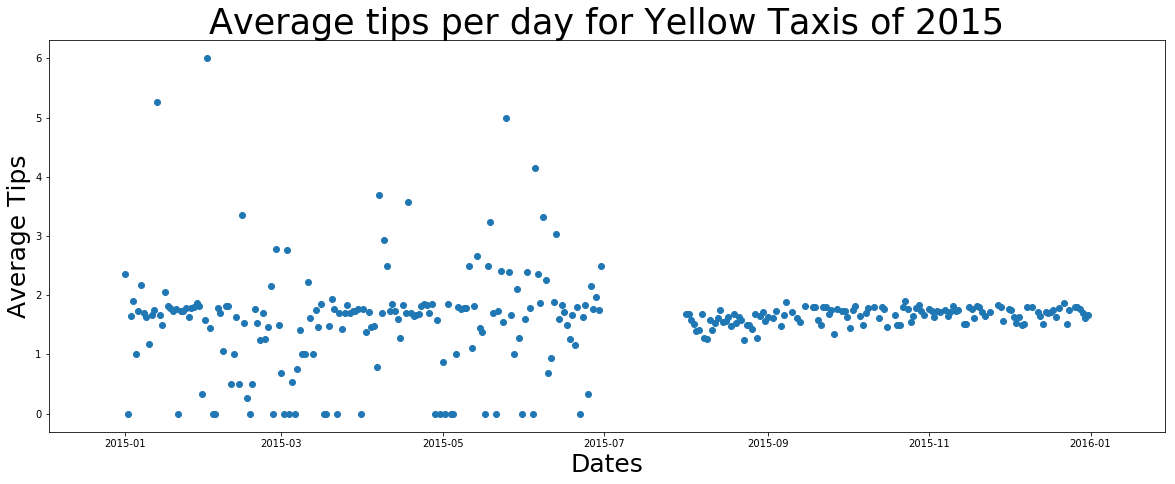

In [67]:
plt.figure(figsize=(20,8))
plt.gcf().autofmt_xdate()
plt.title('Average tips per day for Yellow Taxis of 2015',fontsize=35)
plt.scatter(taxi_data.pickup_date.unique()
         ,taxi_data.groupby(['pickup_date'], sort=True)['tip_amount'].mean())
plt.xlabel('Dates', fontsize=25)
plt.ylabel('Average Tips', fontsize=25)
plt.show()

# Figure 2: A scatterplot depicting the movement of average tips per day across time within 2015.